-----------------------------------------------------------------------------------------------------------------------
# **Employee Attrition Prediction - Decision Tree and Random Forest**
-----------------------------------------------------------------------------------------------------------------------

--------------------
## **Context**
--------------------

Companies believe in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives, and companies often want to bring down the cost of retaining employees. Using underlying data, a prediction model can be built for employees at the risk of attrition.

We will explore 2 different prediction models:
- **Decision Trees**: A tree-like decision based model which takes in features to ask questions which maximize the gain. Uses concepts like gini impurity, entropy and information gain to identify which questions to ask at which node. Although easy to understand and interpret, they are extremely sensitive to any variation in the training data. There is also a high chance of overfitting leading to a less generalized model.
- **Random Forest**: It is a bagging based ensemble learning approach using a number of decision trees. They address some of the concerns of decision trees such as overfitting and sensitivity to training data. However, they are more complicated to interpret and often have high computational requirements

------------------------------------
## **Dataset**
------------------------------------

This is hypothetical dataset from a company looking to predict employee attrition. The data contains information on employees' demographic details, work-related metrics, and attrition flag.

* **EmployeeNumber** - Unique Employee Identifier
* **Attrition** - Did the employee attrite or not?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available
* **Department** - Employee's Department
* **DistanceFromHome** - Distance from work to home (in KM)
* **Education** - Employee's Education. 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Whether the employee is over 18 years of age?
* **OverTime** - Whether the employee is doing overtime?
* **PercentSalaryHike** - The percentage increase in the salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager


## Step 1 - Importing the libraries and initial inspection of data

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the dataset
df = pd.read_excel('/Users/guransingh/Library/CloudStorage/OneDrive-Personal/Documents/Work/Python Notebooks/Python Notebooks/MIT/HREmployee_DecisionTree/HR_Employee_Attrition_Dataset.xlsx')

In [4]:
# Looking at the first 5 records
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

- All the columns have 2940 non-null values,there are no missing values

In [6]:
# Checking the count of unique values in each column
df.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

Lets drop employee number as they are unique and standard hours, over 18 since they are only of 1 kinds

In [7]:
# Dropping the columns
df = df.drop(['EmployeeNumber', 'Over18', 'StandardHours'] , axis = 1)

In [8]:
# Split into numerical and categorical dat
# Creating numerical columns
num_cols = ['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 
            'YearsAtCompany', 'NumCompaniesWorked', 'HourlyRate', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
            'YearsWithCurrManager', 'TrainingTimesLastYear']

# Creating categorical variables
cat_cols = ['Attrition', 'OverTime', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'JobSatisfaction', 'EnvironmentSatisfaction', 
            'WorkLifeBalance', 'StockOptionLevel', 'Gender', 'PerformanceRating', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'RelationshipSatisfaction']

## **Step 2- Exploratory Data Analysis**

### **Univariate analysis of numerical columns**

In [15]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0
PercentSalaryHike,2940.0,15.209524,3.659315,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,2940.0,11.279592,7.779458,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,2940.0,7.008163,6.125483,0.0,3.0,5.0,9.0,40.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0


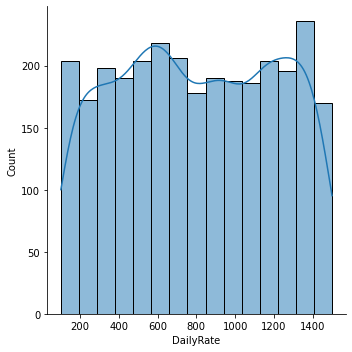

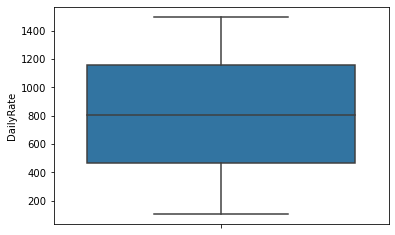

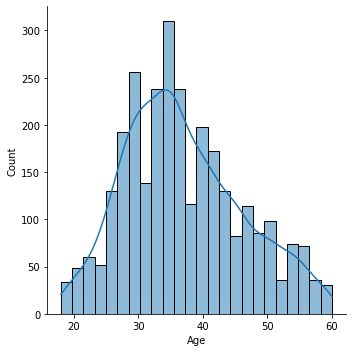

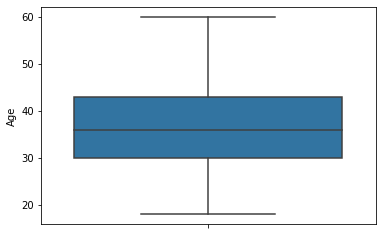

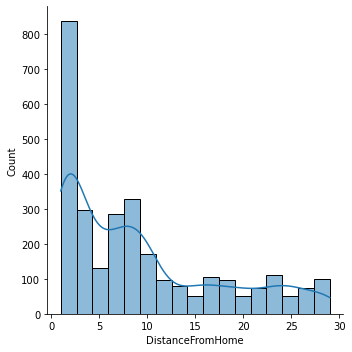

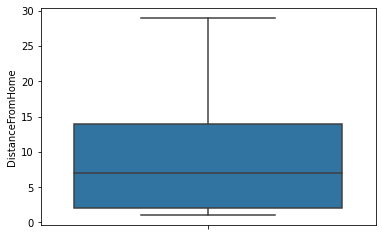

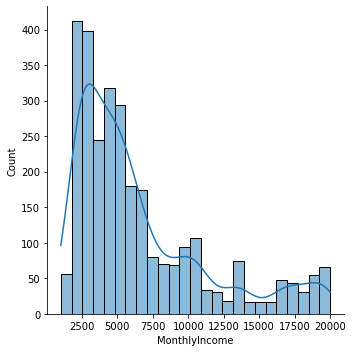

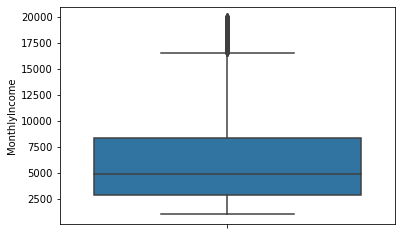

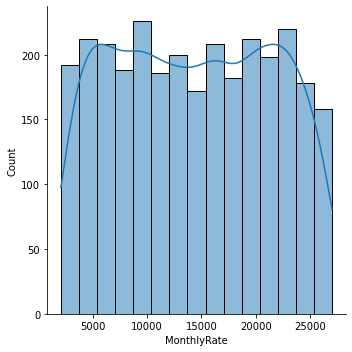

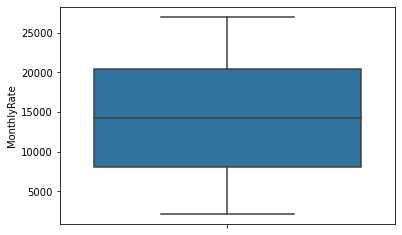

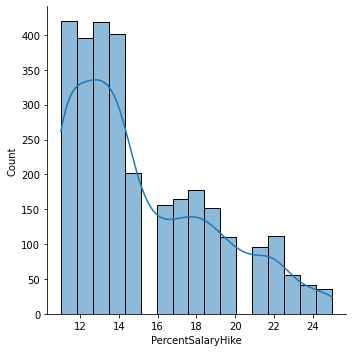

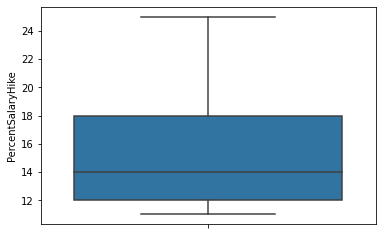

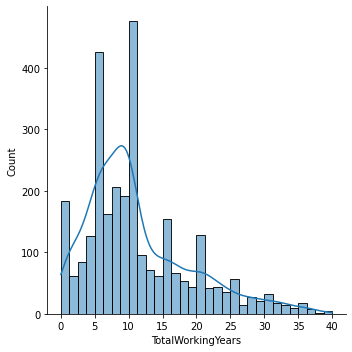

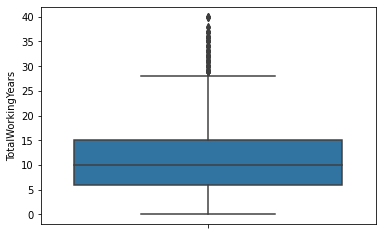

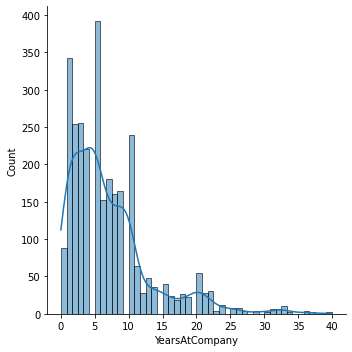

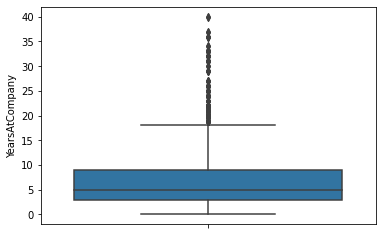

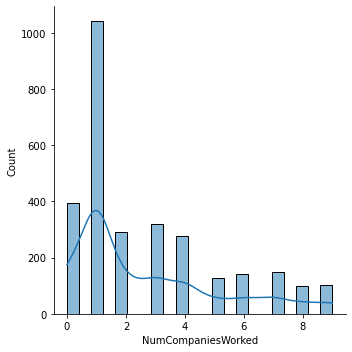

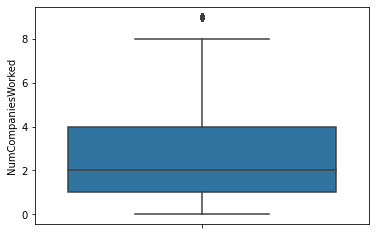

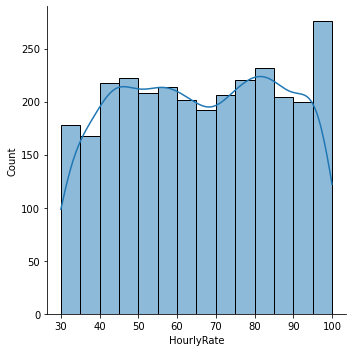

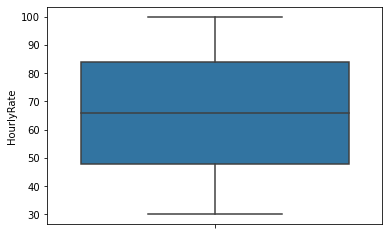

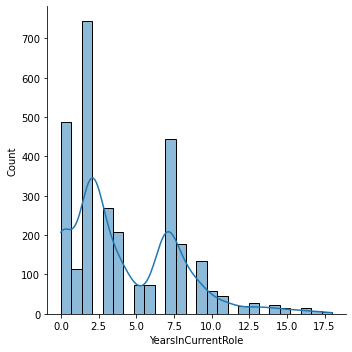

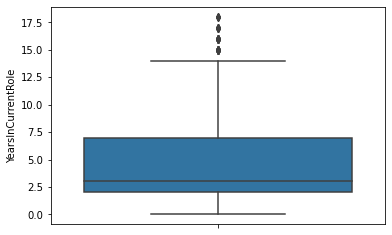

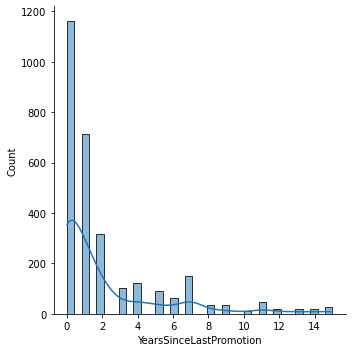

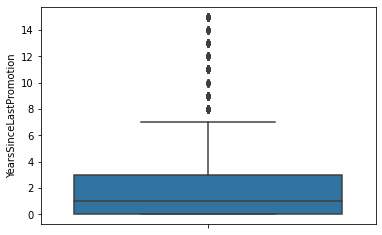

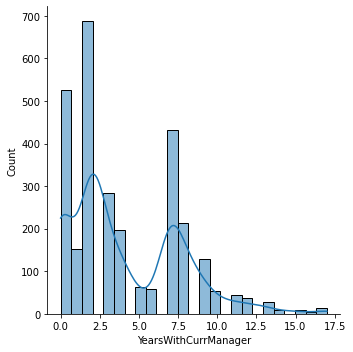

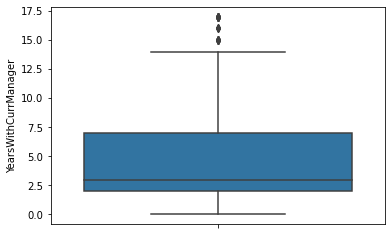

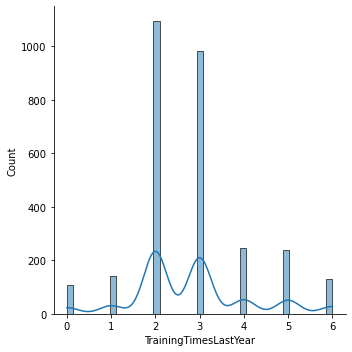

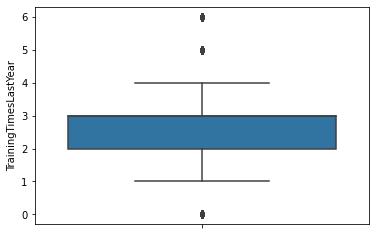

In [10]:
# Create histograms and boxplots on numerical columns
for col in num_cols:
    sns.displot(df[col],kde=True)
    plt.show()
    sns.boxplot(y=df[col])
    plt.show()

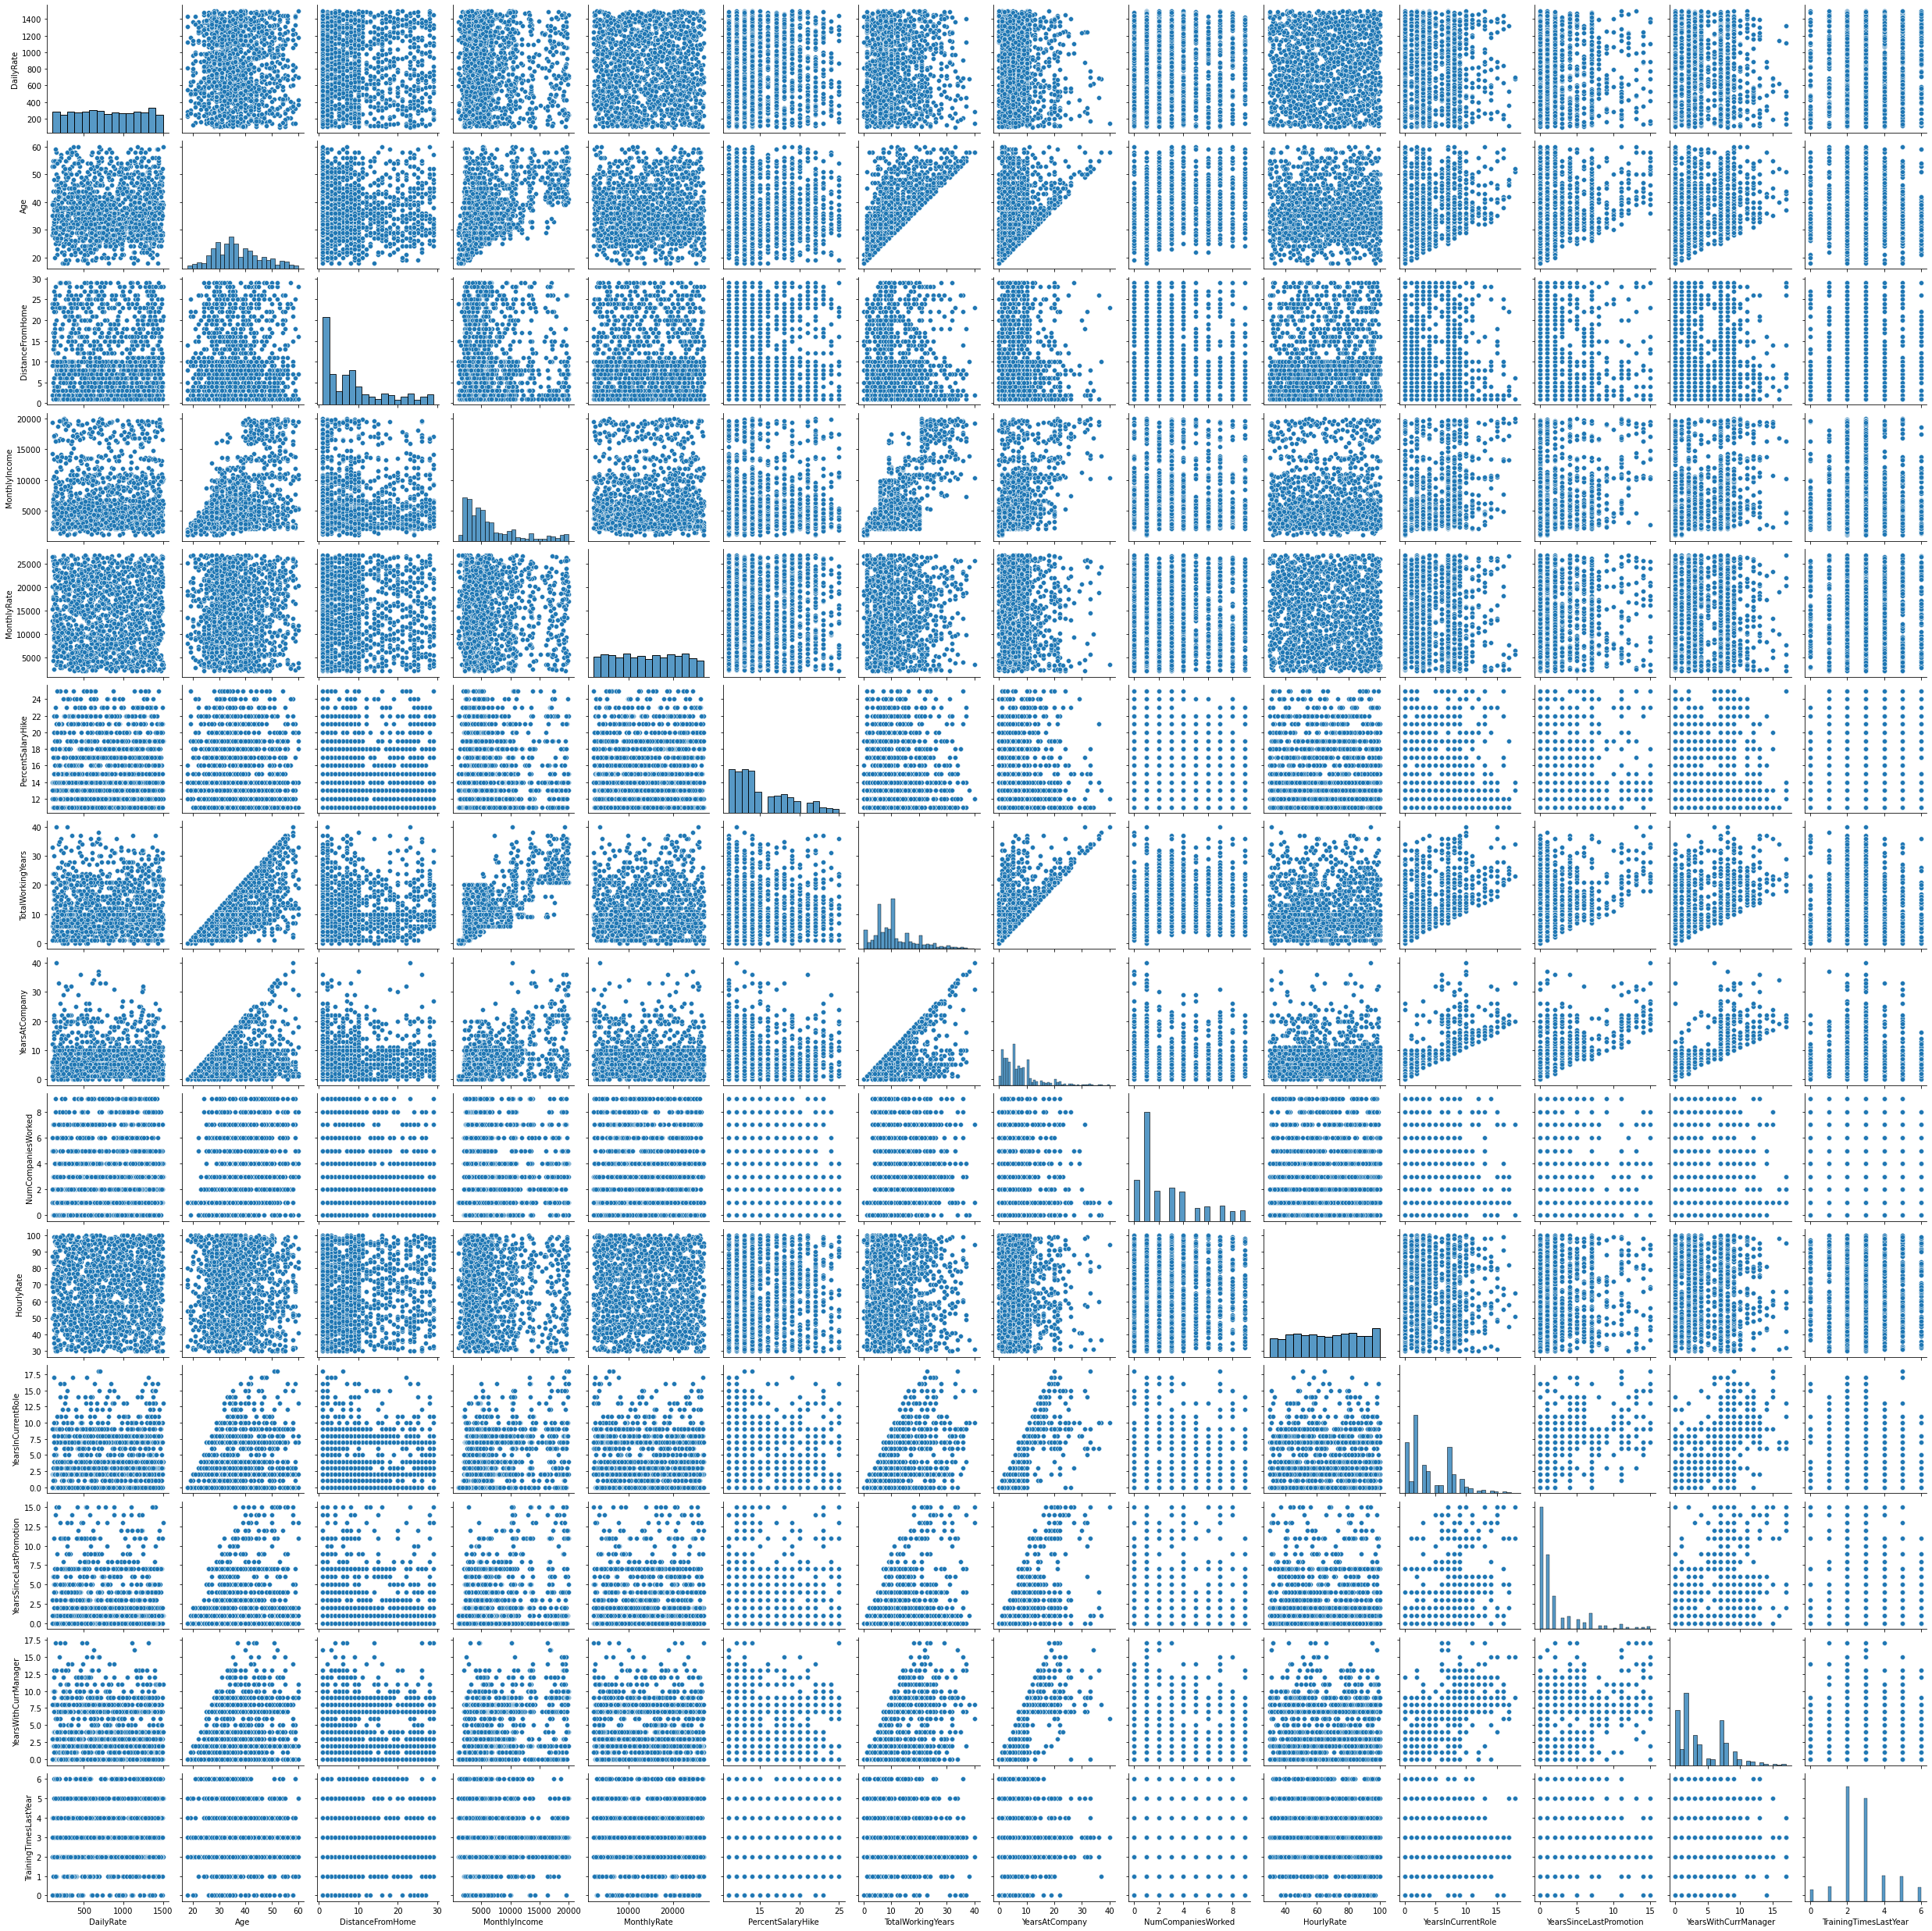

In [11]:
#create pairplots to see bi-variate movements
sns.pairplot(df[num_cols])

In [12]:
#check correlations
df[num_cols].corr()

,DailyRate,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
DailyRate,1.000000,0.010661,-0.004985,0.007707,-0.032182,0.022704,0.014515,-0.034055,0.038153,0.023381,0.009932,-0.033229,-0.026363,0.002453
Age,0.010661,1.000000,-0.001686,0.497855,0.028051,0.003634,0.680381,0.311309,0.299635,0.024287,0.212901,0.216513,0.202089,-0.019621
DistanceFromHome,-0.004985,-0.001686,1.000000,-0.017014,0.027473,0.040235,0.004628,0.009508,-0.029251,0.031131,0.018845,0.010029,0.014406,-0.036942
MonthlyIncome,0.007707,0.497855,-0.017014,1.000000,0.034814,-0.027269,0.772893,0.514285,0.149515,-0.015794,0.363818,0.344978,0.344079,-0.021736
MonthlyRate,-0.032182,0.028051,0.027473,0.034814,1.000000,-0.006429,0.026442,-0.023655,0.017521,-0.015297,-0.012815,0.001567,-0.036746,0.001467
PercentSalaryHike,0.022704,0.003634,0.040235,-0.027269,-0.006429,1.000000,-0.020608,-0.035991,-0.010238,-0.009062,-0.001520,-0.022154,-0.011985,-0.005221
TotalWorkingYears,0.014515,0.680381,0.004628,0.772893,0.026442,-0.020608,1.000000,0.628133,0.237639,-0.002334,0.460365,0.404858,0.459188,-0.035662
YearsAtCompany,-0.034055,0.311309,0.009508,0.514285,-0.023655,-0.035991,0.628133,1.000000,-0.118421,-0.019582,0.758754,0.618409,0.769212,0.003569
NumCompaniesWorked,0.038153,0.299635,-0.029251,0.149515,0.017521,-0.010238,0.237639,-0.118421,1.000000,0.022157,-0.090754,-0.036814,-0.110319,-0.066054
HourlyRate,0.023381,0.024287,0.031131,-0.015794,-0.015297,-0.009062,-0.002334,-0.019582,0.022157,1.000000,-0.024106,-0.026716,-0.020123,-0.008548


<AxesSubplot:>

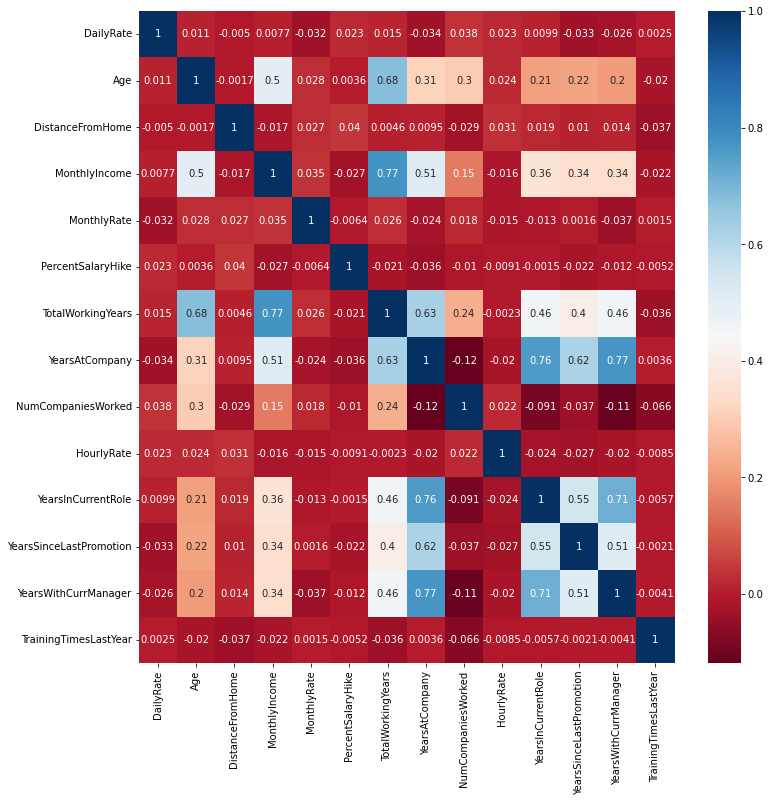

In [15]:
#plot the correlations as a heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='RdBu')

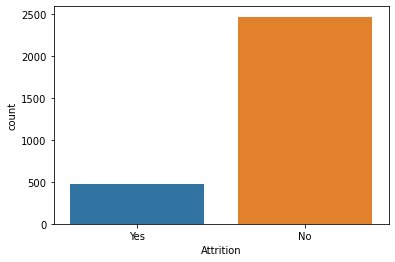

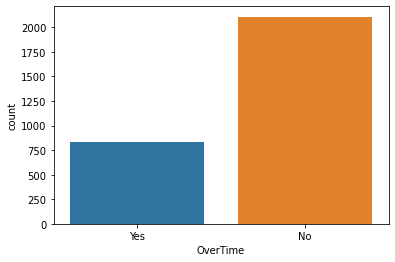

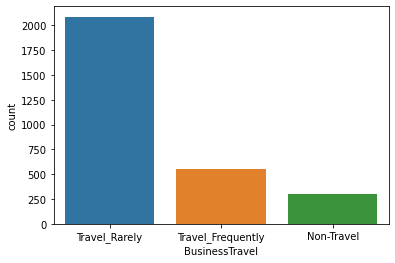

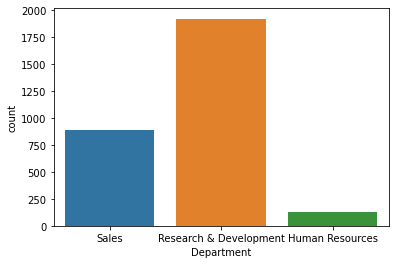

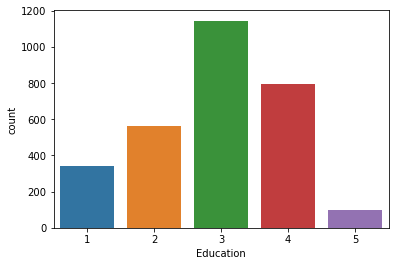

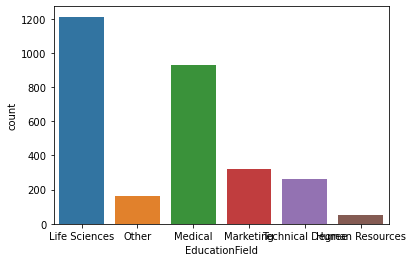

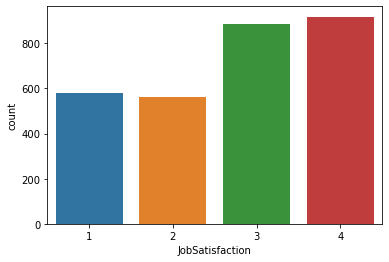

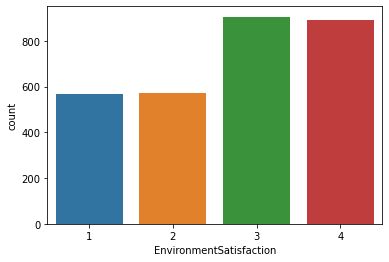

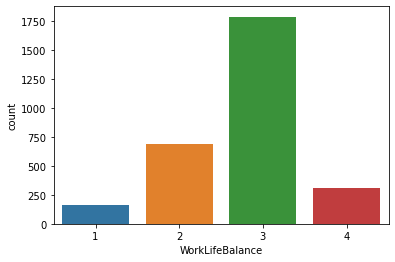

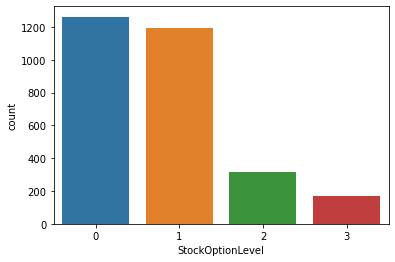

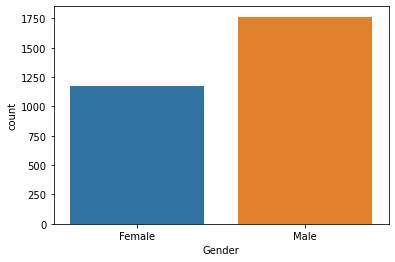

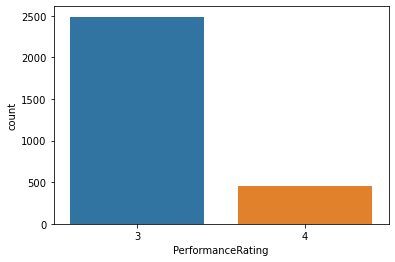

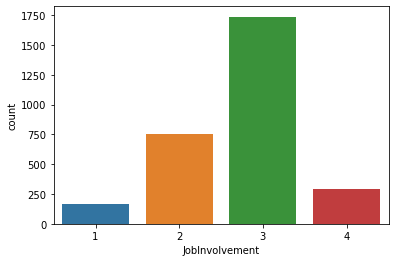

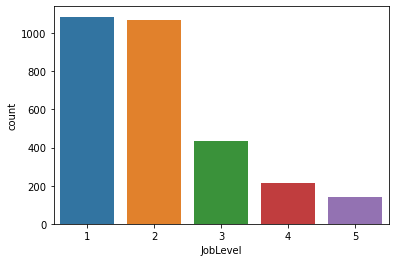

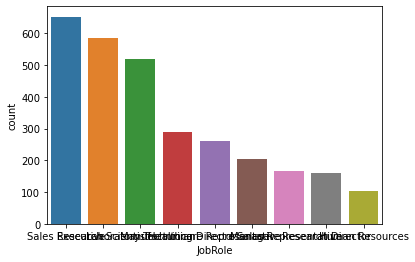

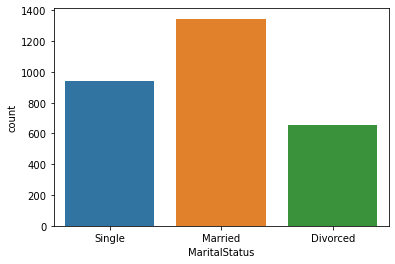

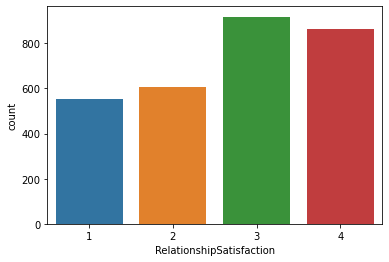

In [18]:
#Countplots on categorical variables
for col in cat_cols:
    sns.countplot(df[col])
    plt.show()

## Step 3 - Data preprocessing

In [19]:
# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'JobRole']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      

# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No': 0}
dict_attrition = {'Yes': 1, 'No': 0}

df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)

In [20]:
# Separating the target variable and other variables

Y = df.Attrition

X = df.drop(['Attrition'], axis = 1)

In [21]:
# Performing train test split with 30% testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In this case, recall is important. The company will want to minimize the error that the employee will not leave, when the employeee actually does.

So we need to minimize false negatives. The higher the recall, the less the false negatives.

In [22]:
# Creating the function which will be used to print the confusion matrix and all the scores

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Attriate', 'Attriate'], yticklabels = ['Not Attriate', 'Attriate'])
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [24]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
               
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

### Step 4 - Build Decision Tree

Since the data set is unbalanced (17%/83%), the model can become unbalanced. We can use a hyperparameter to control for this called class_weight

In [25]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

In [26]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



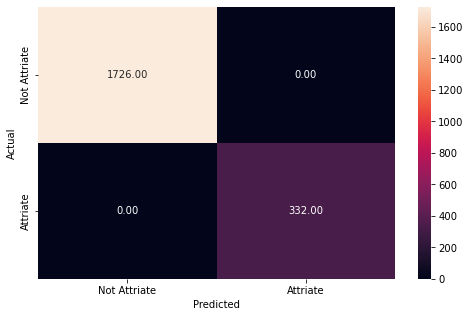

In [27]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

The score is 100%! Looks like the model might be over-fitting to the training data

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       740
           1       0.77      0.85      0.81       142

    accuracy                           0.93       882
   macro avg       0.87      0.90      0.88       882
weighted avg       0.94      0.93      0.94       882



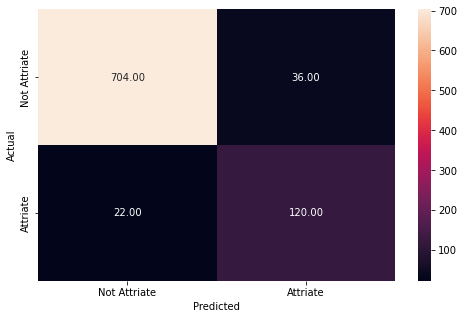

In [28]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

The decision tree has definitely overfit. The test data recall is 95%, while training data is 100!

To fine-tune the model, a few hyperparameters can be adjusted. These include limiting the depth of the tree, specifying the number of leaf nodes or the minimum number of data points needed in a leaf node. We can also change the criteria for determining a node to be either gini impurity or entropy.

We can use grid search CV to find the best combination of the hyper parameters

In [31]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       min_samples_leaf=5, random_state=1)

In [33]:
dtree_estimator

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       min_samples_leaf=5, random_state=1)

The ideal tree has minimium samples of 5 in each leaf and a max depth of only 2

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1726
           1       0.32      0.68      0.43       332

    accuracy                           0.71      2058
   macro avg       0.62      0.70      0.62      2058
weighted avg       0.82      0.71      0.75      2058



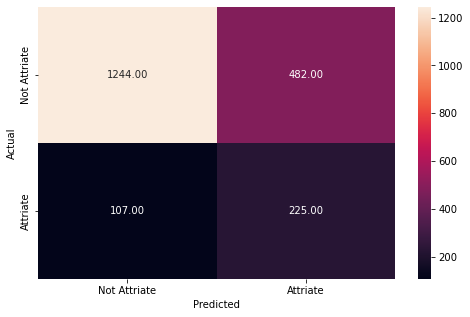

In [34]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

Recall has gone done to only 72% which makes sense since we have regularized the model

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       740
           1       0.29      0.61      0.39       142

    accuracy                           0.70       882
   macro avg       0.60      0.66      0.59       882
weighted avg       0.81      0.70      0.73       882



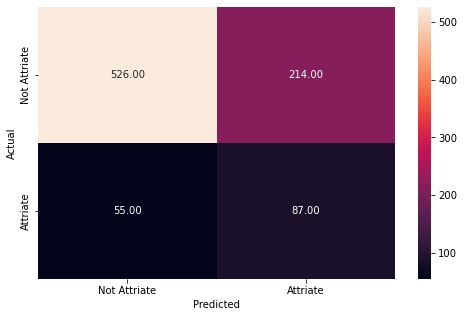

In [35]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

The model performance pretty much the same on testing data, that means that it is not overfitting the training data. However, the score for recall is only 71%, it is pretty low. 

Now lets test the random forest model

## **Step 5 - Build Random Forest**

Random Forest is a bagging algorithm where the base models are Decision Trees.

In [36]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



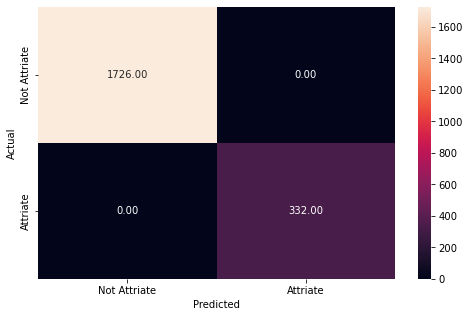

In [37]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

Again, the random forest is giving a 100% recall on training data

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       740
           1       0.97      0.79      0.87       142

    accuracy                           0.96       882
   macro avg       0.96      0.89      0.92       882
weighted avg       0.96      0.96      0.96       882



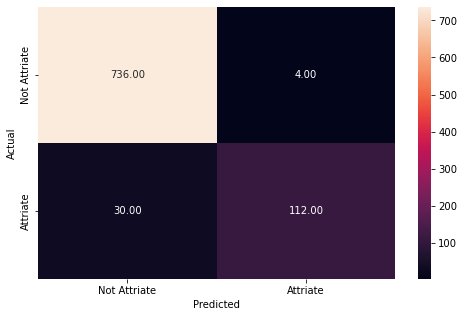

In [38]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

The score on testing data is also very good, recall is 99%. It does not look like RF is over fitting, so we don't need to do any regularization.

If we did need to regularize, a few hyper parameters can be tuned. This inclues min samples in each leaf, the number of features to consider when splitting and the number of DT needed in the ensemble